<a href="https://colab.research.google.com/github/vijaykumarharakuni/mllearning/blob/main/Lasso_Ridge_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data= pd.read_csv('/content/Hitters.csv')
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [2]:
data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [5]:
# Drop the Col # Inplace us for the permanent delete

data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [32]:
# Check for the missing values

data.isnull().sum().any()

True

In [8]:
data.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


535.9258821292775

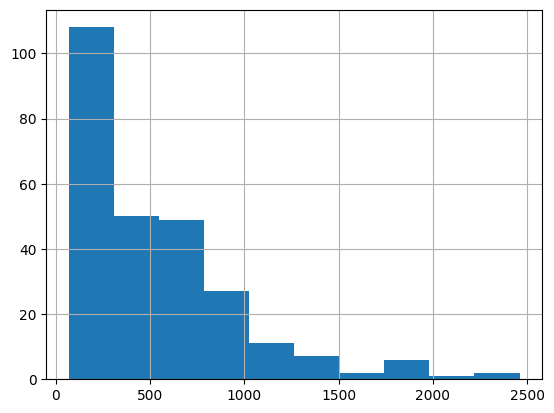

In [33]:
data['Salary'].hist()
data['Salary'].median()
data['Salary'].mean()

In [34]:

#Handle the missing Values we are replacing the null values using the median value replace as we data is right skewed
data['Salary'].fillna(data['Salary'].median(), inplace=True)

In [35]:
data.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [18]:
data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.600953
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.817459
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

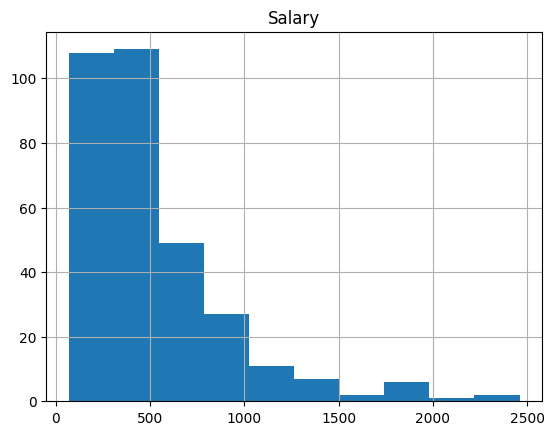

In [36]:
data.hist('Salary')

<Axes: >

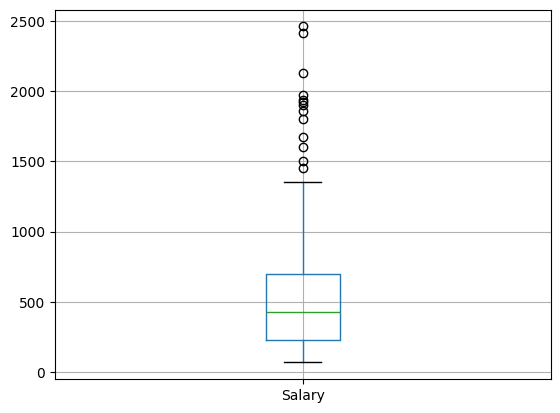

In [37]:
data.boxplot('Salary')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

In [40]:
# Department


data['League'].value_counts()

,count
League,
A,175
N,147


In [39]:
data['Division'].value_counts()

,count
Division,
W,165
E,157


In [26]:
#Encoding - Convering the categortical data into num

#

from sklearn import preprocessing
data['League']=preprocessing.OneHotEncoder()




In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [28]:
data['League'].value_counts()

,count
League,
OneHotEncoder(),322


In [43]:
dummy_data=pd.get_dummies(data[['League','Division','NewLeague']],drop_first=True).astype(int)
dummy_data

,League_N,Division_W,NewLeague_N
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
...,...,...,...
317,1,0,1
318,0,0,0
319,0,1,0
320,0,0,0


In [44]:
new_date=pd.concat([data,dummy_data],axis=1)
new_date

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,League_N,Division_W,NewLeague_N
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,A,E,446,33,20,425.0,A,0,0,0
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,N,W,632,43,10,475.0,N,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,A,W,880,82,14,480.0,A,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,N,E,200,11,3,500.0,N,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,N,E,805,40,4,91.5,N,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,N,E,325,9,3,700.0,N,1,0,1
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,A,E,313,381,20,875.0,A,0,0,0
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,A,W,37,113,7,385.0,A,0,1,0
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,A,E,1314,131,12,960.0,A,0,0,0


In [51]:
new_date.drop(['League','Division','NewLeague'],axis=1,inplace=True)
new_date
new_date.drop('Unnamed: 0',axis=1,inplace=True)

KeyError: "['League', 'Division', 'NewLeague'] not found in axis"

In [53]:
# create Indep var & dep var
X=new_date.drop(['Salary'],axis=1)
y=new_date['Salary']

In [52]:
new_date.drop('Unnamed: 0',axis=1,inplace=True)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 19)
(81, 19)
(241,)
(81,)


In [121]:
# std Scaler ,Z-scaler normalizarion
# op= Value -mean/std
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('completed')

In [66]:
y_pred

array([ 313.45350872,  832.07251524,  314.02121202,  634.77534881,
       1120.01220681,  359.96000328,  457.81774882,  587.77817198,
        149.21527033,  436.63878882,  821.23808042,  346.60347161,
        199.52167756,  916.66904443,  492.25238488,  206.50732829,
        549.37354287,  396.48307356,  571.54376591,  421.92067598,
        386.94917147,  169.95707355,  390.18493905,  910.04111649,
        450.4393045 , 1075.22521517,  441.61964426,  403.09002053,
        901.81420549,  319.70128759,  722.81311549,  453.81275948,
        202.10462793,  502.01740272,  855.49723012,  316.90077465,
        281.26117146,  554.88636547,  818.1775545 ,  322.51297707,
        450.40740552,  397.8934989 ,  433.86981468,  636.94172966,
        330.6838801 , 1271.00752405, 1304.30529402,  352.01461701,
       1076.45861997,  620.31290266,  365.96697238,  135.04589049,
       1417.63033178,  405.63536177,  579.4471586 ,  312.91851041,
        474.8098845 , 1135.23714222,  391.8441266 ,  204.48755

In [80]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred_train=lr.predict(X_train)
print('r2 Score for X test',r2_score(y_test,y_pred))
print('r2 Score for X train',r2_score(y_train,y_pred_train))

r2 Score for X test 0.36603832997192587
r2 Score for X train 0.47551324139717355


In [81]:
# Apply Lasso Regression
from sklearn.linear_model import Lasso,LassoCV
lasso_reg=Lasso(max_iter=10000)
lasso_reg.fit(X_train,y_train)
y_pred_lasso=lasso_reg.predict(X_test)
print('completed')

completed


In [83]:
# Eval lasso with alpha=0.1 model
y_pred_train_lasso=lasso_reg.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_lasso))
print('R2 score test',r2_score(y_test,y_pred_lasso))
print('R2 score train',r2_score(y_train,y_pred_train_lasso))

MSE test data 116100.72973855324
R2 score test 0.38354817600303226
R2 score train 0.4712640255140258


In [84]:
# Apply Lasso Regression and Alpha 10
from sklearn.linear_model import Lasso,LassoCV
lasso_reg=Lasso(alpha=10,max_iter=10000)
lasso_reg.fit(X_train,y_train)
y_pred_lasso=lasso_reg.predict(X_test)
print('completed')
# Eval lasso with alpha=10 model
y_pred_train_lasso=lasso_reg.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_lasso))
print('R2 score test',r2_score(y_test,y_pred_lasso))
print('R2 score train',r2_score(y_train,y_pred_train_lasso))

completed
MSE test data 116762.12935706569
R2 score test 0.3800363892800631
R2 score train 0.3887552407384661


In [88]:
# Perform hp tuning- gridseachCV
#find the best value of alpha --laasoCV
lasso_cv=LassoCV(alphas=np.random.randint(1,1000,100),cv=10,max_iter=10000)
lasso_cv.fit(X_train,y_train)
print('best alpha value',lasso_cv.alpha_)

best alpha value 46


In [89]:
# Apply Lasso Regression and Alpha 10
from sklearn.linear_model import Lasso,LassoCV
lasso_reg=Lasso(alpha=46,max_iter=10000)
lasso_reg.fit(X_train,y_train)
y_pred_lasso=lasso_reg.predict(X_test)
print('completed')
# Eval lasso with alpha=10 model
y_pred_train_lasso=lasso_reg.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_lasso))
print('R2 score test',r2_score(y_test,y_pred_lasso))
print('R2 score train',r2_score(y_train,y_pred_train_lasso))

completed
MSE test data 128762.32658778051
R2 score test 0.3163197917370846
R2 score train 0.3449156107119997


In [90]:
lasso_reg.coef_

array([  0.        ,  55.06945009,   0.        ,   0.        ,
         0.        ,  14.82164177,   0.        ,   0.        ,
         3.42866847,   0.        ,   0.        , 143.46917741,
         0.        ,  11.02661265,   0.        ,  -0.        ,
         0.        , -20.90741802,   0.        ])

In [93]:
#Apply Ridge Regression
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge(max_iter=10000)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print('completed')
# Eval Ridge
y_pred_train_ridge=ridge.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_ridge))
print('R2 score test',r2_score(y_test,y_pred_ridge))
print('R2 score train',r2_score(y_train,y_pred_train_ridge))


completed
MSE test data 116671.20635761706
R2 score test 0.38051915669228864
R2 score train 0.47223036605110746


In [103]:
# Perform hp tuning- gridseachCV
#find the best value of alpha --ridgeCV
ridge_cv=RidgeCV(alphas=np.random.randint(1,1000,100),cv=10)
ridge_cv.fit(X_train,y_train)
ridge_cv_test=ridge_cv.predict(X_test)
print('best alpha value',ridge_cv.alpha_)

best alpha value 243


In [106]:
#Apply
y_pred_train_ridge=ridge_cv.predict(X_train)
print('MSE test data',mean_squared_error(y_test,ridge_cv_test))
print('R2 score test',r2_score(y_test,ridge_cv_test))
print('R2 score train',r2_score(y_train,y_pred_train_ridge))

ridge_cv.coef_
for i,j in zip(ridge_cv.coef_,X.columns):
      print(i,j)

MSE test data 116930.60831767369
R2 score test 0.3791418284723421
R2 score train 0.36236700905321784
6.554014804991031 AtBat
24.849729504830595 Hits
8.41507220096639 HmRun
17.59425326313717 Runs
21.174188738091885 RBI
20.295953184439014 Walks
6.432734335644123 Years
21.768063594141612 CAtBat
30.784096921055653 CHits
27.409904014936547 CHmRun
28.631044528392913 CRuns
32.89080817351478 CRBI
8.16162670339019 CWalks
27.028384374895424 PutOuts
3.076463135580733 Assists
-6.166347884851698 Errors
8.806346386340687 League_N
-33.43295740582561 Division_W
2.386037197509601 NewLeague_N


In [107]:
# ElasticNet Regression

from sklearn.linear_model import ElasticNet,ElasticNetCV
elastic_reg=ElasticNet(l1_ratio=0.5,max_iter=10000)
elastic_reg.fit(X_train,y_train)
y_pred_elastic=elastic_reg.predict(X_test)
print('completed')
# Eval ElasticNet
y_pred_train_elastic=elastic_reg.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_elastic))
print('R2 score test',r2_score(y_test,y_pred_elastic))
print('R2 score train',r2_score(y_train,y_pred_train_elastic))
elastic_reg.coef_
for i,j in zip(elastic_reg.coef_,X.columns):
      print(i,j)

completed
MSE test data 114521.15209837226
R2 score test 0.3919351475546078
R2 score train 0.37984840332279013
-1.9165470689041977 AtBat
31.863570419249502 Hits
4.4260997926724714 HmRun
19.269077109122858 Runs
23.308170219065534 RBI
23.115267787982873 Walks
-1.5461617767933182 Years
21.87217133019942 CAtBat
38.993363167771506 CHits
32.156709808942786 CHmRun
34.694190109239834 CRuns
41.54011317985253 CRBI
-0.9904826732910781 CWalks
34.88953341432786 PutOuts
4.898802597533964 Assists
-10.745299282251617 Errors
12.186464647527108 League_N
-44.657068543669375 Division_W
0.9263102354545044 NewLeague_N


In [108]:
# Apply ElasticNetCV
elastic_cv_model = ElasticNetCV(
    # Using a smaller set of alpha values for simplicity (you can adjust these)
    alphas=[0.1, 1, 10, 100],

    # l1_ratio as a fixed value (e.g., 0.5), meaning a balanced mix between Lasso and Ridge
    l1_ratio=0.5,

    # 5-fold cross-validation (using fewer folds for simplicity)
    cv=5,

    # Allow a maximum of 1000 iterations to converge (default is usually sufficient)
    max_iter=1000
)
elastic_cv_model.fit(X_train,y_train)
elastic_cv_model.alpha_

0.1

In [111]:
%%time
from sklearn.linear_model import ElasticNet,ElasticNetCV
elasticnet_reg=ElasticNet(alpha=0.1,l1_ratio=0.5,max_iter=10000)
elasticnet_reg.fit(X_train,y_train)
y_pred_elastic=elasticnet_reg.predict(X_test)
print('completed')
y_pred_train_elastic=elasticnet_reg.predict(X_train)
print('MSE test data',mean_squared_error(y_test,y_pred_elastic))
print('R2 score test',r2_score(y_test,y_pred_elastic))
print('R2 score train',r2_score(y_train,y_pred_train_elastic))

completed
MSE test data 112857.5198948507
R2 score test 0.4007684176695363
R2 score train 0.4399662917878835
CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 16.4 ms


In [112]:
import joblib
joblib.dump(elasticnet_reg,'elasticnet_reg.pkl')
print('model saved')

model saved


In [113]:
#Load the model
model=joblib.load('elasticnet_reg.pkl')

In [114]:
%%time
model.predict(X_test)

CPU times: user 637 µs, sys: 0 ns, total: 637 µs
Wall time: 656 µs


array([ 266.18125433,  712.26091447,  293.80446562,  744.95938818,
        959.06132655,  392.4827864 ,  551.86751262,  575.34396516,
        244.7882695 ,  506.95618859,  808.42456103,  350.24442768,
        322.59596247,  870.06257147,  492.17456614,  268.91878235,
        484.33357294,  412.04510065,  651.66183065,  489.67247534,
        396.83287436,  276.26977596,  332.10396106,  797.39682926,
        365.29365712,  980.69229844,  507.87495879,  383.69047245,
        847.50578188,  331.23204636,  712.37276959,  444.55048371,
        197.23837922,  509.08173824,  834.72912902,  340.51958398,
        263.99391427,  535.26631486,  817.35659961,  330.1252625 ,
        434.27313498,  319.68892229,  435.23356296,  651.26740584,
        358.34106965, 1107.11179032, 1102.32413408,  302.80484166,
       1011.75617891,  610.42000292,  374.73601406,  155.20881327,
       1249.50116264,  379.5022261 ,  579.47668988,  233.47931319,
        449.48665013, 1035.11278192,  402.03901685,  226.08986

In [115]:
X.iloc[0,:].values

array([293,  66,   1,  30,  29,  14,   1, 293,  66,   1,  30,  29,  14,
       446,  33,  20,   0,   0,   0])

In [122]:
#colab suggested this
sc.transform([X.iloc[0,:].values])

array([[ 2.93000000e+02,  6.60000000e+01,  1.00000000e+00,
         3.00000000e+01,  2.90000000e+01,  1.40000000e+01,
         1.00000000e+00,  2.93000000e+02,  6.60000000e+01,
         1.00000000e+00,  3.00000000e+01,  2.90000000e+01,
         1.40000000e+01,  4.46000000e+02,  3.30000000e+01,
         2.00000000e+01, -3.68538763e-18,  1.47415505e-17,
        -7.37077527e-18]])

In [123]:
# pred salary
salary=model.predict(sc.transform([X.iloc[0,:].values]))
salary

array([6317.73902953])